In [8]:
#import re                                  # library for regular expression operations
#import string                              # for string operations
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt            # library for visualization
import nltk                                # Python library for NLP
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import word_tokenize    # module for tokenizing strings

from sklearn.model_selection import train_test_split

#We are going to use a tokenizer that requires the Punkt sentence tokenization models to be installed.
nltk.download('punkt')
# download the stopwords from NLTK
nltk.download('stopwords')
    
import functions as fun


[nltk_data] Downloading package punkt to /Users/marta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/marta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df = pd.read_csv("data/DatasetFinal.csv", index_col=False)
df.head(2)

,Unnamed: 0,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813.0
1,1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100.0


In [10]:
df.shape

(8361, 14)

Hay algunos cursos que están duplicados con distinta Keyword (no seguían una regla concreta). Hemos ido comprobándolos en la página web de Coursera para poder limpiar y eliminar los que eran erróneos.
Hemos cambiado la keyword de alguno y borrado los que tenían errores

In [11]:
#Cambio Keywords
df.loc[df["Course Title"]=="Data Manipulation at Scale: Systems and Algorithms", "Keyword"] = "DataScience"
#Este en concreto estaba mal su etiqueta (tenía Arts and Humanities y debía ser DataScience)
df.loc[df["Course Title"]=="Management Communication 管理沟通", "Keyword"] = "Business"
#Este en concreto estaba mal su etiqueta (tenía Arts and Humanities y debía ser Business)

In [12]:
drop_rows_with_errors = [451,473,7882,1526,2061,2961,7688,6015,2148,3752,1927,3085,3035,7498,5549,469,449,458,7815,6021,3236,5692,7442,454,466,464,2594,7584]
df.drop(drop_rows_with_errors, inplace=True)
df.shape

(8333, 14)

# 1.PREPROCESSING

* Remove hyperlinks or hashtags - We'll use the [re](https://docs.python.org/3/library/re.html)

* Tokenize the string - To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily

* Remove stop words and punctuations

* Stemming - NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) 

In [13]:
# Listados de ciencias y humanidades:
df_science = df[df["Keyword"] != "Arts and Humanities"]
df_humanities = df[df["Keyword"] == "Arts and Humanities"]

#print(df_humanities["Course Title"].iloc[422], "\n", df_science["Course Title"].iloc[534])

In [14]:
print(f"The size of the humanities dataframe is: {df_humanities["Course Title"].shape}")
print(f"The size of the science dataframe is: {df_science["Course Title"].shape}")

The size of the humanities dataframe is: (461,)
The size of the science dataframe is: (7872,)


In [15]:
row_humanities = list(df_humanities["Course Title"])
row_science = list(df_science["Course Title"][:476])
all_rows = (row_science) + (row_humanities)

In [16]:
print(type(all_rows), len(all_rows))

<class 'list'> 937


In [17]:
# Combination of humanities and science labels
y = np.append(np.ones((len(row_science), 1)), np.zeros((len(row_humanities), 1)), axis=0)

### Train test split: 20% will be in the test set, and 80% in the training set.

In [18]:
# Conjunto de entrenamiento
def get_data_train(title,label):
    # Obtenemos el 80% del conjunto de datos como conjunto de entrenamiento."
    train_x, test_x, train_y, test_y = train_test_split(title, label, test_size=0.20, random_state=42)

    return train_x, test_x, train_y, test_y

In [19]:
train_x, test_x, train_y, test_y = get_data_train(all_rows,y)
print(type(train_x), len(train_x), len(test_x))
print(type(test_y), len(train_y), len(test_y))

<class 'list'> 749 188
<class 'numpy.ndarray'> 749 188


### Word Count - frequency dictionary

In [20]:
# create frequency dictionary
freqs = fun.build_freqs(train_x, train_y)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 1353


In [21]:
# frequency dictionary
print(freqs)

{('success', 1.0): 10, ('negoti', 1.0): 4, ('essenti', 1.0): 6, ('strategi', 1.0): 23, ('skill', 1.0): 15, ('ibm', 1.0): 5, ('project', 1.0): 17, ('manag', 1.0): 33, ('profession', 1.0): 20, ('certif', 1.0): 16, ('global', 1.0): 6, ('impact', 1.0): 4, ('busi', 1.0): 289, ('ethic', 1.0): 3, ('品读道家的智慧', 0.0): 1, ('structur', 1.0): 1, ('build', 1.0): 5, ('frame', 1.0): 1, ('growth', 1.0): 6, ('中國人文經典導讀', 0.0): 1, ('do', 1.0): 5, ('china', 1.0): 2, ('special', 1.0): 76, ('introduct', 0.0): 22, ('game', 0.0): 9, ('design', 0.0): 22, ('intern', 1.0): 13, ('context', 1.0): 1, ('creativ', 0.0): 5, ('write', 0.0): 17, ('the', 0.0): 59, ('craft', 0.0): 3, ('charact', 0.0): 1, ('《论语》的智慧', 0.0): 1, ('становление', 0.0): 1, ('современной', 0.0): 1, ('украины', 0.0): 1, ('luther', 0.0): 1, ('west', 0.0): 1, ('lesson', 1.0): 3, ('english', 1.0): 24, ('introduc', 1.0): 1, ('yourself', 1.0): 1, ('set', 1.0): 1, ('improv', 1.0): 1, ('perform', 1.0): 1, ('googl', 1.0): 15, ('form', 1.0): 2, ('onlin', 0.0

In [22]:
print(f"In science titles, 'science' is repeated {freqs[('scienc', 1.0)]} times")
print(f"In humanities titles, 'science' is repeated {freqs[('scienc', 0.0)]} time")

In science titles, 'science' is repeated 3 times
In humanities titles, 'science' is repeated 10 time


# 2. Frequency table: 
We will use this for our titles and len(freqs) = 1341

In [23]:
new_course = "Financial Markets"
p = fun.preprocessing(new_course)
print(p)

# list representing our table of word counts.
data = []

# loop through our selected words
for word in p:
    # initialize science and humanities counts
    sci = 0
    hum = 0
    # retrieve number of science counts
    if (word, 1) in freqs:
        sci = freqs[(word, 1)]
    # retrieve number of humanities counts
    if (word, 0) in freqs:
        hum = freqs[(word, 0)]
    # append the word counts to the table
    data.append([word, sci, hum])
    
data

['financi', 'market']


[['financi', 5, 0], ['market', 21, 1]]

## 3. Training Your Model

In [24]:
# Collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))

for i in range(len(train_x)):
    X[i, :] = fun.extract_features(train_x[i], freqs)

# Training labels corresponding to X
Y = train_y

In [25]:
X.shape

(749, 3)

Iteration 0: Cost = 0.36303704563925276
Iteration 1: Cost = 0.3197900386767916
Iteration 2: Cost = 0.2965535078650919
Iteration 3: Cost = 0.2817334679690504
Iteration 4: Cost = 0.2712762820025313
Iteration 5: Cost = 0.26339523435410933
Iteration 6: Cost = 0.25717599363714866
Iteration 7: Cost = 0.25209989805821864
Iteration 8: Cost = 0.2478496176234304
Iteration 9: Cost = 0.24421934918263688
Iteration 10: Cost = 0.24106925620059502
Iteration 11: Cost = 0.23830062276592276
Iteration 12: Cost = 0.23584149776805421
Iteration 13: Cost = 0.23363799653700243
Iteration 14: Cost = 0.23164881541315813
Iteration 15: Cost = 0.2298416518398772
Iteration 16: Cost = 0.22819079728851843
Iteration 17: Cost = 0.22667547570528887
Iteration 18: Cost = 0.2252786695073542
Iteration 19: Cost = 0.22398627258494652
Iteration 20: Cost = 0.22278646766415233
Iteration 21: Cost = 0.221669260792046
Iteration 22: Cost = 0.22062612792235653
Iteration 23: Cost = 0.21964974284761174
Iteration 24: Cost = 0.218733765082

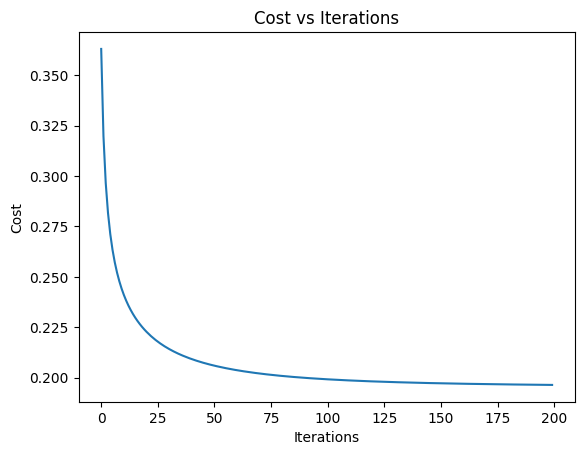

In [26]:
# Initialize arrays to store cost and iteration values
costs = []
iterations = []

# Initialize theta outside the loop
theta = np.zeros((3, 1))

# Apply gradient descent
for iteration in range(200):
    J, theta = fun.gradientDescent(X, Y, theta, 1e-5, 200)
    costs.append(J)
    iterations.append(iteration)
    print(f"Iteration {iteration}: Cost = {J}")

print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

# Plot cost vs iterations
plt.plot(iterations, costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


In [27]:
df_train_x = pd.DataFrame(X)
df_train_x["type"] = train_y
df_train_x["course"] = train_x
df_train_x.set_index(["course"], inplace = True) 
df_train_x.rename(columns={0:"bias", 1:"scince", 2:"humanities"}, inplace = True)

df_train_x.head()

,bias,scince,humanities,type
course,,,,
Successful Negotiation: Essential Strategies and Skills,1.0,58.0,4.0,1.0
IBM Project Manager Professional Certificate,1.0,91.0,9.0,1.0
Global Impact: Business Ethics,1.0,302.0,13.0,1.0
品读道家的智慧,1.0,0.0,1.0,0.0
Structure: Building the Frame for Business Growth,1.0,302.0,6.0,1.0


### 3.1. Prediction

In [35]:
new_course = "Sports Business Analysis"
#new_course = "Children in Primary Education" 
#new_course = "Writing the best essay for university interviews about education"

y_hat = fun.predict_title(new_course, freqs, theta)
if y_hat < 0.5:
    print(f"{y_hat} -> {new_course} is a course about humanities")
else:
    print(f"{y_hat} -> {new_course} is a course about science")

[[0.99999996]] -> Sports Business Analysis is a course about science


### 3.2 -  Checking the Performance using the Test Set
* Given the test data and the weights of the trained model, we calculate the accuracy of the logistic regression model. 

In [36]:
accuracy = fun.test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {accuracy:.4f}")

Logistic regression model's accuracy = 0.9521


In [30]:
# Error analysis
print('Label Predicted Course')
for x,y in zip(test_x,test_y):
    y_hat = fun.predict_title(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE row IS:', x)
        print('THE PROCESSED row IS:', fun.preprocessing(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(fun.preprocessing(x)).encode('ascii', 'ignore')))

Label Predicted Course
THE row IS: Mercados financieros
THE PROCESSED row IS: ['mercado', 'financiero']
1	0.49447031	b'mercado financiero'
THE row IS: How to Create Color Gradients in Adobe Illustrator
THE PROCESSED row IS: ['how', 'creat', 'color', 'gradient', 'adob', 'illustr']
0	0.50669798	b'how creat color gradient adob illustr'
THE row IS: Introduction to Corporate Finance
THE PROCESSED row IS: ['introduct', 'corpor', 'financ']
1	0.11056530	b'introduct corpor financ'


/var/folders/np/2h53vflx42jd3w_yxn33bvv40000gn/T/ipykernel_48909/2796818583.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(fun.preprocessing(x)).encode('ascii', 'ignore')))


THE row IS: Introduction to Operations Management
THE PROCESSED row IS: ['introduct', 'oper', 'manag']
1	0.35447958	b'introduct oper manag'
THE row IS: Photography Basics and Beyond: From Smartphone to DSLR Specialization
THE PROCESSED row IS: ['photographi', 'basic', 'beyond', 'from', 'smartphon', 'dslr', 'special']
0	0.54469339	b'photographi basic beyond from smartphon dslr special'
THE row IS: Libertarian Free Will Specialization
THE PROCESSED row IS: ['libertarian', 'free', 'will', 'special']
0	0.54165912	b'libertarian free will special'
THE row IS: Corporate Sustainability. Understanding and Seizing the Strategic Opportunity 
THE PROCESSED row IS: ['corpor', 'sustain', 'understand', 'seiz', 'strateg', 'opportun']
1	0.24805822	b'corpor sustain understand seiz strateg opportun'
THE row IS: Become a Journalist: Report the News! Specialization
THE PROCESSED row IS: ['becom', 'journalist', 'report', 'new', 'special']
0	0.66462178	b'becom journalist report new special'
THE row IS: Build